**Install dependencies**

In [ ]:
pip install --upgrade pip setuptools wheel

In [ ]:
!pip install tensorflow==2.12.0
!pip install tensorflow-gpu==2.12.0
!pip install matplotlib opencv-python

In [1]:
import tensorflow as tf
import os

In [2]:
import numpy as np
from matplotlib import pyplot as plt

**LOAD DATA**

In [3]:
data = tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [4]:
data = tf.keras.utils.image_dataset_from_directory('data') #make the data set automatically, default batch size 32 and image scaled to 256x256

Found 1016 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator() #iterate over the dataset

In [6]:
 batch = data_iterator.next() #just for testing but used to go to the next batch

**SCALE DATA**

In [7]:
data = data.map(lambda x,y: (x/255, y))#normalization of pixels
data.as_numpy_iterator().next()

(array([[[[4.17647064e-01, 8.60784292e-01, 9.94117618e-01],
          [4.13725495e-01, 8.56862724e-01, 9.90196049e-01],
          [4.11764711e-01, 8.54901969e-01, 9.88235295e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.37254906e-01],
          [9.92156863e-01, 1.00000000e+00, 9.37254906e-01],
          [9.92156863e-01, 1.00000000e+00, 9.37254906e-01]],
 
         [[4.17647064e-01, 8.60784292e-01, 9.94117618e-01],
          [4.13725495e-01, 8.56862724e-01, 9.90196049e-01],
          [4.11764711e-01, 8.54901969e-01, 9.88235295e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.29411769e-01],
          [9.88235295e-01, 1.00000000e+00, 9.25490201e-01],
          [9.88235295e-01, 1.00000000e+00, 9.25490201e-01]],
 
         [[4.19607848e-01, 8.62745106e-01, 9.96078432e-01],
          [4.19607848e-01, 8.62745106e-01, 9.96078432e-01],
          [4.11764711e-01, 8.54901969e-01, 9.88235295e-01],
          ...,
          [9.86274481e-01, 9.98039186e-01, 9.1960

**SPLIT DATA**

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
#Splitting the dataset into the three diff sets in the ratio 70-20-10(common practice)

In [9]:
test_size
#checking the number of batches for each set

3

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)#assign batches to each set

**BUILD MODEL**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
#Used for transforming the model

In [12]:
model = Sequential() #used to execute the layers in a sequentiol order

In [13]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#Conv2D creates filters that iterate or convolve over the image,these filters
# are basically matrices of random numbers and their output is the dotproduct of the matrix with the pixel values it iterates over
#relu is an activation function which stands for Rectified Linear Unit, basically updates all values below zero to zero and others remain same
#input shape gives the image size and number of color channels
# the 16 and 3x3 represents the number of filters and size of filters, each filter recognizes a specific feature, 1 gives the stride of the filter
#The new matrix created by the dot products is called the feature map
model.add(MaxPooling2D())
#Scaled the feature map down by taking another kernel or filter and taking out the max values from the feauture map and storing into a new map
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#We repeat the process to scale the map as down as possible as we are working with 3 channels
#also as we increase the number of layers, we create more abstract patterns and can observe more complex patterns
model.add(Flatten())
#turns the two dimensional map into one long continuos array
model.add(Dense(256, activation='relu'))
#Adds a fully connected (Dense) layer with 256 neurons and ReLU activation. 
#This layer takes the flattened feature representation and learns non-linear combinations of these features.
model.add(Dense(1, activation='sigmoid'))
#Adds another fully connected layer, this time with a single neuron and a sigmoid activation function. 
#This setup is typical for binary classification problems, where the output is the probability of the input belonging to the positive class
#(e.g., "1" for "yes" and "0" for "no"). The sigmoid function ensures that the output value falls between 0 and 1, 
#making it interpretable as a probability.

In [14]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#adam is the optimizer
#BinaryCrossentropy tries to minimize losses by minimize the difference between the predicted probabilities and the actual binary outcomes.

**TRAIN MODEL**

In [ ]:
logdir='logs'#creates a directory to store the logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)#TensorBoard is a visualization tool provided with TensorFlow that 
#allows you to view metrics such as loss and accuracy, visualize the model graph
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#Used to train the model and store the history in a variable so we can access it later to evaluate its performance,train gives the training data
#epochs are the number of times it iterates over the data
#callback log metrics like accuracy and losses

Epoch 1/20
22/22 [==============================] - 35s 1s/step - loss: 0.6292 - accuracy: 0.7443 - val_loss: 0.1502 - val_accuracy: 0.9583
Epoch 2/20
22/22 [==============================] - 31s 1s/step - loss: 0.2289 - accuracy: 0.9077 - val_loss: 0.0658 - val_accuracy: 0.9792
Epoch 3/20
22/22 [==============================] - 30s 1s/step - loss: 0.1000 - accuracy: 0.9616 - val_loss: 0.0420 - val_accuracy: 0.9896
Epoch 4/20
22/22 [==============================] - 30s 1s/step - loss: 0.0698 - accuracy: 0.9815 - val_loss: 0.0301 - val_accuracy: 0.9948
Epoch 5/20
22/22 [==============================] - 32s 1s/step - loss: 0.0486 - accuracy: 0.9872 - val_loss: 0.1001 - val_accuracy: 0.9531
Epoch 6/20
22/22 [==============================] - 31s 1s/step - loss: 0.0399 - accuracy: 0.9815 - val_loss: 0.0210 - val_accuracy: 0.9948
Epoch 7/20
22/22 [==============================] - 38s 2s/step - loss: 0.0263 - accuracy: 0.9901 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 8/20
22/22 [==

**PLOT PERFORMACES**

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()#simple matplotlib to evaluate the losses over epochs

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()#same for accuracy

**EVALUATE MODEL**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): #iterate over all the batches and find out the complete evaluation metrics
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

f1=(2*(pre.result()*re.result()))/(pre.result()+re.result())#calculate f1 score
print("Precision is: ",pre.result().numpy())
print("Recall is: ", re.result().numpy())
print("Accuracy is: ", acc.result().numpy())
print("F1 score is: ",f1.numpy())

**TESTING**

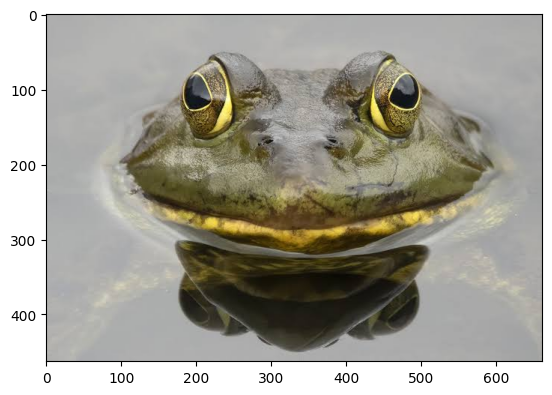

In [129]:
import cv2
img = cv2.imread('pepe-negative-test-tricky.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))#color statement because cv2 uses BGR color coding by default
plt.show()#just to check what image ur uploading

In [130]:
resize = tf.image.resize(img, (256,256))#resizing the image


In [131]:
yhat = model.predict(np.expand_dims(resize/255, 0))#predicting the output
#we divide it by 255 for normalization of pixels
#by expand dims we add an extra dimension to the image, as the model is trained on batches of images, by doing this we create a batch that has 1 image

1/1 [==============================] - 0s 62ms/step


In [132]:
yhat

array([[0.19662127]], dtype=float32)

**PRINT RESULT**

In [133]:
if(yhat>0.5):
    print("IT IS PEPE")

else:
    print("IT IS NOT PEPE")

#As this model classifies 1 as positive and 0 as negative, we take 0.5 to be factor where it changes

IT IS NOT PEPE
